In [1]:
import numpy as np
import math
import re
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [2]:
df01=pd.read_csv(r'C:\Users\tekin\Desktop\ML\Tweedy\TechLemma_D1906.csv',index_col=False)

In [3]:
y_vect=np.array(df01.edInput)
text_vect=np.array(df01.text[:].values)

In [4]:
X_train1, X_test, y_train1, y_test =train_test_split(text_vect,
            y_vect,random_state=0,test_size=0.1,stratify=y_vect)

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.1,stratify=y_train1)

In [580]:
VOCAB_SIZE = 2**12
max_length = len(max(df01['text'].values,key=len))
trunc_type='post'
pad_type='post'
oov_tok = "<OOV>"

In [581]:
mytknzr=Tokenizer(num_words = VOCAB_SIZE,filters='!"&()*+,-./:;<=>?[\\]^_`{|}~\t\n', lower=False,char_level=False, oov_token=oov_tok)
mytknzr.fit_on_texts(X_train)
print(len(mytknzr.word_index))
mytknzr.word_index


21959


{'<OOV>': 1,
 '#ai': 2,
 '@digitaltrends': 3,
 '@spirosmargaris': 4,
 '@ronald': 5,
 'vanloon': 6,
 '#fintech': 7,
 '#artificialintelligence': 8,
 '#machinelearning': 9,
 '@mikequindazzi': 10,
 '@mashable': 11,
 '@verge': 12,
 'Cc': 13,
 '#iot': 14,
 '#bigdata': 15,
 'via': 16,
 '#deeplearning': 17,
 '@cheddar': 18,
 '#robotics': 19,
 '#datascience': 20,
 '#ml': 21,
 '@jblefevre60': 22,
 'new': 23,
 '#tech': 24,
 '@techreview': 25,
 'make': 26,
 '$': 27,
 '#digital': 28,
 '#technology': 29,
 '@ipfconline1': 30,
 '#innovation': 31,
 '@paula': 32,
 'piccard': 33,
 '@psb': 34,
 'dc': 35,
 '@fisher85m': 36,
 '#insurtech': 37,
 '@haroldsinnott': 38,
 'use': 39,
 '#internetofthings': 40,
 '@andi': 41,
 'staub': 42,
 '#digitaltransformation': 43,
 '#mi': 44,
 '#blockchain': 45,
 'Read': 46,
 'get': 47,
 'good': 48,
 '#cybersecurity': 49,
 '#analytics': 50,
 '#dl': 51,
 '2019': 52,
 '#futureofwork': 53,
 '@sallyeaves': 54,
 '#data': 55,
 '#5g': 56,
 'could': 57,
 'Apple': 58,
 "'": 59,
 '10': 

In [584]:
# Pad the sequences so that they are all the same length

training_sequences = mytknzr.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences,maxlen=max_length, 
                                truncating=trunc_type, padding=pad_type)

validation_sequences = mytknzr.texts_to_sequences(X_val)
validation_padded = pad_sequences(validation_sequences,maxlen=max_length)

test_sequences = mytknzr.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences,maxlen=max_length, 
                                truncating=trunc_type, padding=pad_type)
print(training_padded.shape)

(11644, 382)


In [676]:
tf.keras.backend.clear_session()

In [677]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.SpecificityAtSensitivity(0.7,name='spcsens'),  
      tf.keras.metrics.SensitivityAtSpecificity(0.9,name='snsspec'),      
]

In [678]:
#WEIGHTED MODEL

negative = len(y_vect[y_vect==0])
positive = len(y_vect[y_vect==1])
print(negative,'\n',positive)
total = negative + positive
weight_for_0 = (1 / negative)*(total)/2.0 
weight_for_1 = (1 / positive)*(total)/2.0
#weight_for_1 = 100

class_weight = {0: weight_for_0, 1: weight_for_1}
val_sample_weights = sk_class_wgt.compute_sample_weight(class_weight, y_val)
train_sample_weights = sk_class_wgt.compute_sample_weight(class_weight, y_train)
test_sample_weights = sk_class_wgt.compute_sample_weight(class_weight, y_test)


print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
initial_bias = np.log([positive/total])
initial_bias


1584 
 12792
Weight for class 0: 4.54
Weight for class 1: 0.56


array([-0.11674017])

In [679]:
#Config

#VOCAB_SIZE = tokenizer.vocab_size

EMB_DIM = 100
NB_FILTERS = 100
FFN_UNITS = 512
FFN_UNITS1 = 256
NB_CLASSES = 2#len(set(train_labels))
LR_RATE=5e-4
LR_RATEB=1e-3
DROPOUT_RATE = 0.5
DROPOUT_RATE1=0.1

BATCH_SIZE = 64
NB_EPOCHS = 100



def make_model(vocab_size=VOCAB_SIZE,emb_dim=EMB_DIM,nb_filters=NB_FILTERS,
               dropout_rate=DROPOUT_RATE,metrics = METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = keras.initializers.Constant(output_bias)
#tf.keras.layers.Conv1D(embedding_dim, nb_filters, activation='relu'),
#    tf.keras.layers.GlobalMaxPooling1D(),

vctinp=layers.Input(shape=training_padded.shape[1])
lyembd=layers.Embedding(VOCAB_SIZE,EMB_DIM,input_length=max_length)(vctinp)
lybigram = layers.Conv1D(filters=NB_FILTERS,
                                    kernel_size=2,
                                    padding="valid",
                                    activation="relu")(lyembd)
lybigram=layers.GlobalMaxPool1D()(lybigram) 
lytrigram = layers.Conv1D(filters=NB_FILTERS,
                                     kernel_size=3,
                                     padding="valid",
                                     activation="relu")(lyembd)
lytrigram=layers.GlobalMaxPool1D()(lytrigram) 
lyfourgram = layers.Conv1D(filters=NB_FILTERS,
                                      kernel_size=4,
                                      padding="valid",
                                      activation="relu")(lyembd)
lyfourgram=layers.GlobalMaxPool1D()(lyfourgram) 

dense_1 = layers.Dense(units=FFN_UNITS, activation="relu")
dropout = layers.Dropout(rate=DROPOUT_RATE)


merged = tf.concat([lybigram,lytrigram,lyfourgram], axis=-1) # (batch_size, 3 * nb_filters)
merged = dense_1(merged)
merged = dropout(merged)
output=layers.Dense(units=1,activation="sigmoid")(merged)
Dcnn = tf.keras.Model(inputs=vctinp, outputs=output) 
#    model = tf.keras.Model(outputs=output) 

    


In [680]:
#CNN with bi,tri and fourgram
#activity_regularizer=regularizers.l2(0.01)
vctinp=layers.Input(shape=training_padded.shape[1])
lyembd=layers.Embedding(VOCAB_SIZE,EMB_DIM,input_length=max_length)(vctinp)
lybigram = layers.Conv1D(filters=NB_FILTERS,
                                    kernel_size=2,
                                    padding="valid"
                                    ,kernel_regularizer=regularizers.l2(0.001))(lyembd)
lybigram=layers.Dropout(rate=DROPOUT_RATE1)(lybigram)
#lybigram=layers.BatchNormalization(renorm=True)(lybigram)
lybygram=layers.Activation("relu")(lybigram)
lybigram=layers.GlobalMaxPool1D()(lybigram) 

lytrigram = layers.Conv1D(filters=NB_FILTERS,
                                     kernel_size=3,
                                     padding="valid"
                                     ,kernel_regularizer=regularizers.l2(0.001))(lyembd)
lytrigram=layers.Dropout(rate=DROPOUT_RATE1)(lytrigram)
#lytrigram=layers.BatchNormalization(renorm=True)(lytrigram)
lytrigram=layers.Activation("relu")(lytrigram)
lytrigram=layers.GlobalMaxPool1D()(lytrigram) 
lyfourgram = layers.Conv1D(filters=NB_FILTERS,
                                      kernel_size=4,
                                      padding="valid"
                                      ,kernel_regularizer=regularizers.l2(0.001))(lyembd)
lyfourgram=layers.Dropout(rate=DROPOUT_RATE1)(lyfourgram)
#lyfourgram=layers.BatchNormalization(renorm=True)(lyfourgram)
lyfourgram=layers.Activation("relu")(lyfourgram)
lyfourgram=layers.GlobalMaxPool1D()(lyfourgram) 

dense_1 = layers.Dense(units=FFN_UNITS,activity_regularizer=regularizers.l2(0.01)
                      ,kernel_regularizer=regularizers.l2(0.001))
#dense_2 = layers.Dense(units=FFN_UNITS1,activity_regularizer=regularizers.l2(0.01)
#                      ,kernel_regularizer=regularizers.l2(0.001))




merged = tf.concat([lybigram,lytrigram,lyfourgram], axis=-1) # (batch_size, 3 * nb_filters)
merged = dense_1(merged)
merged = layers.Dropout(rate=DROPOUT_RATE)(merged)
merged=  layers.BatchNormalization(renorm=True)(merged)
merged=  layers.Activation("relu",)(merged)

#merged = dense_2(merged)
#merged = layers.Dropout(rate=DROPOUT_RATE)(merged)
#merged=  layers.BatchNormalization(renorm=True)(merged)
#merged=  layers.Activation("relu",)(merged)
output_bias = tf.keras.initializers.Constant(initial_bias)
output=layers.Dense(units=1,activation="sigmoid",bias_initializer=output_bias)(merged)
Dcnn = tf.keras.Model(inputs=vctinp, outputs=output) 
#    model = tf.keras.Model(outputs=output) 

    


In [681]:

class LearningRateDecay:
    def plot(self, epochs, title="Learning Rate Schedule"):
        # compute the set of learning rates for each corresponding
        # epoch
        lrs = [self(i) for i in epochs]
        # the learning rate schedule
        plt.style.use("ggplot")
        plt.figure()
        plt.plot(epochs, lrs)
        plt.title(title)
        plt.xlabel("Epoch #")
        plt.ylabel("Learning Rate")
        
class PolynomialDecay():
    def __init__(self, maxEpochs=100, initAlpha=0.01, power=1.0):
        # store the maximum number of epochs, base learning rate,
        # and power of the polynomial
        self.maxEpochs = maxEpochs
        self.initAlpha = initAlpha
        self.power = power
    def __call__(self, epoch):
        # compute the new learning rate based on polynomial decay
        decay = (1 - (epoch / float(self.maxEpochs))) ** self.power

        alpha = self.initAlpha * decay
        print("decay:",decay,">> lr:",alpha)
        # return the new learning rate
        return float(alpha)


In [682]:
schedule = PolynomialDecay(maxEpochs=NB_EPOCHS, initAlpha=5e-4, power=1)
schedule.__call__(1)

decay: 0.99 >> lr: 0.000495


0.000495

In [683]:
#decay = 1e-2 / NB_EPOCHS
schedule = PolynomialDecay(maxEpochs=NB_EPOCHS, initAlpha=5e-4, power=1)
#schedule = StepDecay(initAlpha=1e-1, factor=0.25, dropEvery=15)

In [684]:
#Dcnn=make_model()
#opt = tf.keras.optimizers.Adam(lr=LR_RATE, momentum=0.9, decay=1e-2/NB_EPOCHS)
Dcnn.compile(
  optimizer=tf.keras.optimizers.Adam(lr=LR_RATE),
  loss=tf.keras.losses.BinaryCrossentropy(),
  metrics=METRICS, weighted_metrics=[METRICS[4]])

Dcnn.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 382)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 382, 100)     409600      input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 380, 100)     30100       embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 379, 100)     40100       embedding[0][0]                  
______________________________________________________________________________________________

In [685]:

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_weighted_accuracy', 
    verbose=1,
    patience=10, #30
    mode='max',
    restore_best_weights=True)    
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "techdcnn_woutsbwrd_chkpt.h5", save_best_only=True)
lrscheduler=tf.keras.callbacks.LearningRateScheduler(schedule)


In [686]:
#**************************************
#Keras metrics doesn't work right if we don't add sample_weights for val data when fitting your model
#*************************************

wgtdcnn2=Dcnn.fit(training_padded,
         y_train,
         sample_weight=train_sample_weights,
         batch_size=BATCH_SIZE,
         epochs=NB_EPOCHS,
         validation_data=(validation_padded, y_val, val_sample_weights),
         callbacks = [early_stopping,model_checkpoint,lrscheduler]
        ,class_weight=class_weight
        )
#        ,class_weight=class_weight
#ckpt_manager.save()
#         validation_data=(validation_padded, y_val, val_sample_weights),

Train on 11644 samples, validate on 1294 samples
decay: 1.0 >> lr: 0.0005
Epoch 1/100
11644/11644 [==============================] - 71s 6ms/sample - loss: 1.4074 - tp: 587.0000 - fp: 4.0000 - tn: 1279.0000 - fn: 9774.0000 - weighted_accuracy: 0.8933 - precision: 0.9932 - recall: 0.0567 - auc: 0.6835 - spcsens: 0.5690 - snsspec: 0.2194 - val_loss: 1.2711 - val_tp: 241.0000 - val_fp: 0.0000e+00 - val_tn: 143.0000 - val_fn: 910.0000 - val_weighted_accuracy: 0.6053 - val_precision: 1.0000 - val_recall: 0.2094 - val_auc: 0.8474 - val_spcsens: 0.8531 - val_snsspec: 0.5752
decay: 0.99 >> lr: 0.000495
Epoch 2/100
11644/11644 [==============================] - 72s 6ms/sample - loss: 0.7608 - tp: 5540.0000 - fp: 21.0000 - tn: 1262.0000 - fn: 4821.0000 - weighted_accuracy: 0.9342 - precision: 0.9962 - recall: 0.5347 - auc: 0.9275 - spcsens: 0.9556 - snsspec: 0.8069 - val_loss: 1.1235 - val_tp: 285.0000 - val_fp: 1.0000 - val_tn: 142.0000 - val_fn: 866.0000 - val_weighted_accuracy: 0.6209 - val_p

11644/11644 [==============================] - 128s 11ms/sample - loss: 0.0553 - tp: 10331.0000 - fp: 0.0000e+00 - tn: 1283.0000 - fn: 30.0000 - weighted_accuracy: 0.9997 - precision: 1.0000 - recall: 0.9971 - auc: 0.9996 - spcsens: 1.0000 - snsspec: 0.9991 - val_loss: 0.9460 - val_tp: 509.0000 - val_fp: 13.0000 - val_tn: 130.0000 - val_fn: 642.0000 - val_weighted_accuracy: 0.6760 - val_precision: 0.9751 - val_recall: 0.4422 - val_auc: 0.7954 - val_spcsens: 0.7552 - val_snsspec: 0.4700
decay: 0.84 >> lr: 0.00042
Epoch 17/100
11644/11644 [==============================] - 113s 10ms/sample - loss: 0.0486 - tp: 10343.0000 - fp: 0.0000e+00 - tn: 1283.0000 - fn: 18.0000 - weighted_accuracy: 0.9998 - precision: 1.0000 - recall: 0.9983 - auc: 0.9997 - spcsens: 1.0000 - snsspec: 0.9994 - val_loss: 1.0376 - val_tp: 412.0000 - val_fp: 10.0000 - val_tn: 133.0000 - val_fn: 739.0000 - val_weighted_accuracy: 0.6445 - val_precision: 0.9763 - val_recall: 0.3579 - val_auc: 0.7935 - val_spcsens: 0.7483 

In [440]:
train_predictions_wgt = Dcnn.predict(training_padded, batch_size=BATCH_SIZE)
test_predictions_wgt = Dcnn.predict(test_padded, batch_size=BATCH_SIZE)

In [687]:
#test_sample_weights = sk_class_wgt.compute_sample_weight(class_weight, y_test)
wgtdcnn_results = Dcnn.evaluate(test_padded, y_test,
                                           batch_size=BATCH_SIZE, verbose=0,sample_weight=test_sample_weights)
for name, value in zip(Dcnn.metrics_names, wgtdcnn_results ):
  print(name, ': ', value)
print()

#plot_cm(y_test, test_predictions_weighted)


loss :  0.9339879083865541
tp :  706.0
fp :  22.0
tn :  136.0
fn :  574.0
weighted_accuracy :  0.7059173
precision :  0.9697802
recall :  0.5515625
auc :  0.8115828
spcsens :  0.79113925
snsspec :  0.46640626
weighted_accuracy :  0.7059173



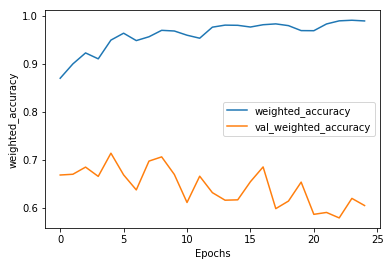

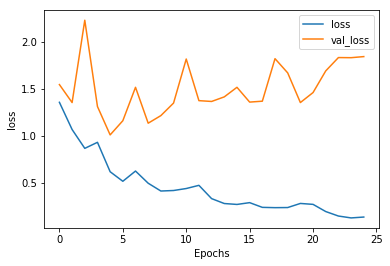

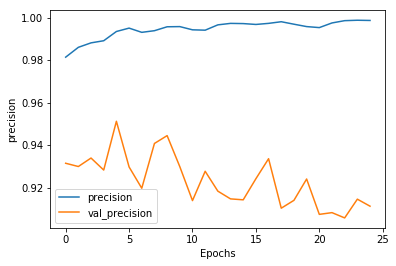

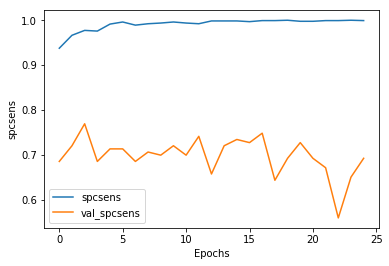

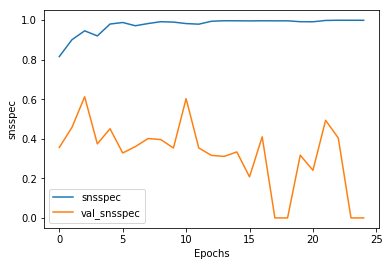

In [346]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

#plot_graphs(wgtdcnn2, "binacc")
plot_graphs(wgtdcnn2, "weighted_accuracy")
plot_graphs(wgtdcnn2, "loss")
plot_graphs(wgtdcnn2, "precision")
plot_graphs(wgtdcnn2, "spcsens")
plot_graphs(wgtdcnn2, "snsspec")

Dcnn.fit(train_inputs,
         train_labels,
         batch_size=BATCH_SIZE,
         epochs=NB_EPOCHS,
        class_weight=class_weight)
ckpt_manager.save()

In [166]:
wgtdcnn=Dcnn.fit(training_padded,
         y_train,
         batch_size=BATCH_SIZE,
         epochs=NB_EPOCHS,
         validation_data=(validation_padded, y_val),
         callbacks = [early_stopping,model_checkpoint]
        ,class_weight=class_weight
        )
#        ,class_weight=class_weight
#ckpt_manager.save()

Train on 11644 samples, validate on 1294 samples
Epoch 1/50
11644/11644 [==============================] - 103s 9ms/sample - loss: 0.6423 - tp: 7147.0000 - fp: 467.0000 - tn: 816.0000 - fn: 3214.0000 - accuracy: 0.6839 - precision: 0.9387 - recall: 0.6898 - auc: 0.7265 - spcsens: 0.6017 - snsspec: 0.3469 - val_loss: 0.6163 - val_tp: 639.0000 - val_fp: 17.0000 - val_tn: 126.0000 - val_fn: 512.0000 - val_accuracy: 0.5912 - val_precision: 0.9741 - val_recall: 0.5552 - val_auc: 0.8048 - val_spcsens: 0.7483 - val_snsspec: 0.5421
Epoch 2/50
11644/11644 [==============================] - 102s 9ms/sample - loss: 0.4830 - tp: 7919.0000 - fp: 249.0000 - tn: 1034.0000 - fn: 2442.0000 - accuracy: 0.7689 - precision: 0.9695 - recall: 0.7643 - auc: 0.8604 - spcsens: 0.8574 - snsspec: 0.6010 - val_loss: 0.5995 - val_tp: 711.0000 - val_fp: 17.0000 - val_tn: 126.0000 - val_fn: 440.0000 - val_accuracy: 0.6468 - val_precision: 0.9766 - val_recall: 0.6177 - val_auc: 0.8348 - val_spcsens: 0.8322 - val_snss

Epoch 18/50
11644/11644 [==============================] - 107s 9ms/sample - loss: 4.9126e-04 - tp: 10360.0000 - fp: 0.0000e+00 - tn: 1283.0000 - fn: 1.0000 - accuracy: 0.9999 - precision: 1.0000 - recall: 0.9999 - auc: 1.0000 - spcsens: 1.0000 - snsspec: 1.0000 - val_loss: 0.7318 - val_tp: 1067.0000 - val_fp: 90.0000 - val_tn: 53.0000 - val_fn: 84.0000 - val_accuracy: 0.8655 - val_precision: 0.9222 - val_recall: 0.9270 - val_auc: 0.7332 - val_spcsens: 0.6294 - val_snsspec: 0.0000e+00
Epoch 19/50
11644/11644 [==============================] - 103s 9ms/sample - loss: 7.1335e-04 - tp: 10360.0000 - fp: 0.0000e+00 - tn: 1283.0000 - fn: 1.0000 - accuracy: 0.9999 - precision: 1.0000 - recall: 0.9999 - auc: 1.0000 - spcsens: 1.0000 - snsspec: 0.9999 - val_loss: 0.7730 - val_tp: 1046.0000 - val_fp: 86.0000 - val_tn: 57.0000 - val_fn: 105.0000 - val_accuracy: 0.8524 - val_precision: 0.9240 - val_recall: 0.9088 - val_auc: 0.7610 - val_spcsens: 0.7133 - val_snsspec: 0.0000e+00
Epoch 20/50
11644/1

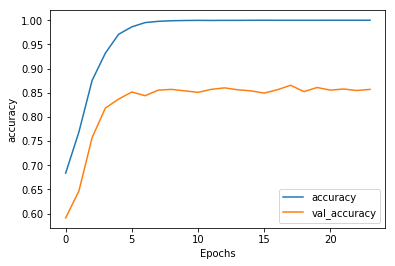

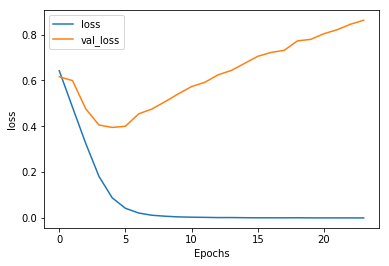

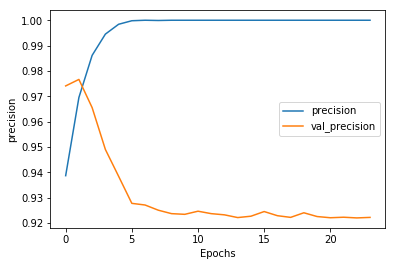

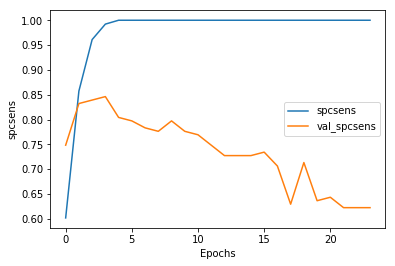

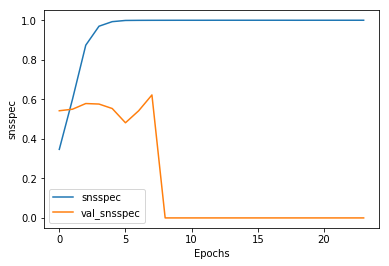

In [262]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(wgtdcnn, "accuracy")
plot_graphs(wgtdcnn, "loss")
plot_graphs(wgtdcnn, "precision")
plot_graphs(wgtdcnn, "spcsens")
plot_graphs(wgtdcnn, "snsspec")



In [298]:
print(class_weight)

{0: 4.537878787878788, 1: 0.5619136960600375}


In [350]:
Dcnn.save(r'C:\Users\tekin\Desktop\ML\Tweedy\saved_models\tech\dcnnwgtacc1906')

In [322]:
from sklearn.utils import class_weight as sk_class_wgt
from sklearn.metrics import accuracy_score

cls_weights = sk_class_wgt.compute_class_weight('balanced', np.unique(y_test), 
                                                y_train)
print("cls_weight:",cls_weights)
print("my class weight:",class_weight)
val_sample_weights = sk_class_wgt.compute_sample_weight(class_weight, y_test)

# Predict model
y_pred = Dcnn.predict(test_padded, batch_size=256, verbose=1)
y_pred_binary = (y_pred > 0.5) * 1

# Classify predictions based on threshold at 0.5
y_pred_binary = (y_pred > 0.5) * 1

sklearn_accuracy = accuracy_score(y_test, y_pred_binary)
sklearn_weighted_accuracy = accuracy_score(y_test, y_pred_binary, 
                                           sample_weight=val_sample_weights)

metric_list = Dcnn.evaluate(test_padded, y_test, batch_size=256, verbose=1, 
                             sample_weight=val_sample_weights)




cls_weight: [4.53780203 0.56191487]
my class weight: {0: 4.537878787878788, 1: 0.5619136960600375}
1438/1438 [==============================] - 5s 4ms/sample - loss: 1.2841 - tp: 1189.0000 - fp: 90.0000 - tn: 68.0000 - fn: 91.0000 - accuracy: 0.8741 - mtracc: 0.0000e+00 - precision: 0.9296 - recall: 0.9289 - auc: 0.7760 - spcsens: 0.7152 - snsspec: 0.4734 - weighted_acc: 0.6800


In [321]:
(1189*0.56+68*4.54)/((1189*0.56+68*4.54)+(90*4.54+91*0.56))

0.6795526176331129

In [170]:

#Dcnn.save_weights(r'C:\Users\tekin\Desktop\ML\Tweedy\saved_models\tech\techdcnn_woutsbwrd.h5')
#dcnnld=Dcnn.load_weights(r'C:\Users\tekin\Desktop\ML\Tweedy\saved_models\tech\techdcnn_woutsbwrd.h5')


In [315]:
#dcnnld=tf.keras.models.load_model(r'C:\Users\tekin\Desktop\ML\Tweedy\saved_models\tech\dcnn')
dcnnld=tf.keras.models.load_model(r'C:\Users\tekin\Desktop\ML\Tweedy\techdcnn_woutsbwrd_chkpt.h5')

train_predictions_wgt = dcnnld.predict(training_padded, batch_size=BATCH_SIZE)
test_predictions_wgt = dcnnld.predict(test_padded, batch_size=BATCH_SIZE)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [316]:
wgtdcnn_results = dcnnld.evaluate(test_padded, y_test,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(dcnnld.metrics_names, wgtdcnn_results ):
  print(name, ': ', value)
print()

#plot_cm(y_test, test_predictions_weighted)


loss :  0.5850382207663567
tp :  1210.0
fp :  97.0
tn :  61.0
fn :  70.0
accuracy :  0.8838665
mtracc :  0.0
precision :  0.92578423
recall :  0.9453125
auc :  0.75408673
spcsens :  0.70253164
snsspec :  0.0
weighted_acc :  0.8838665



In [ ]:
loss :  0.5357021042385419
tp :  1189.0
fp :  86.0
tn :  72.0
fn :  91.0
accuracy :  0.87691236
precision :  0.932549
recall :  0.92890626
auc :  0.7978367
spcsens :  0.5443038
snsspec :  0.0


loss :  0.6139214623289413
tp :  1201.0
fp :  85.0
tn :  73.0
fn :  79.0
accuracy :  0.8859527
precision :  0.9339036
recall :  0.93828124
auc :  0.77478987
spcsens :  0.5316456
snsspec :  0.0
    
loaded results from model.save
loss :  0.6213368145083187
tp :  702.0
fp :  20.0
tn :  138.0
fn :  578.0
accuracy :  0.58414465
precision :  0.97229916
recall :  0.5484375
auc :  0.82636476
spcsens :  0.5063291
snsspec :  0.5054687

loaded from checkpoint
loss :  0.3534205239861996
tp :  1098.0
fp :  56.0
tn :  102.0
fn :  182.0
accuracy :  0.8344923
precision :  0.9514731
recall :  0.8578125
auc :  0.85922915
spcsens :  0.56329113
snsspec :  0.628125

val spcsen .7 
loss :  0.38862892409193334
tp :  1091.0
fp :  52.0
tn :  106.0
fn :  189.0
accuracy :  0.8324061
precision :  0.9545057
recall :  0.85234374
auc :  0.84817296
spcsens :  0.8607595
snsspec :  0.571875

loaded from checkpoint avl_spcsens .7
loss :  0.3801011817428764
tp :  1136.0
fp :  61.0
tn :  97.0
fn :  144.0
accuracy :  0.8574409
precision :  0.9490393
recall :  0.8875
auc :  0.83830845
spcsens :  0.84810126
snsspec :  0.5445312
    
    
after batch norm

loss :  0.4372000847638731
tp :  1016.0
fp :  33.0
tn :  125.0
fn :  264.0
accuracy :  0.7934632
precision :  0.96854144
recall :  0.79375
auc :  0.85873216
spcsens :  0.84177214
snsspec :  0.61875
    
val_acc from metrics.Accuracy
loss :  0.5652750555182365
tp :  1259.0
fp :  130.0
tn :  28.0
fn :  21.0
accuracy :  0.89499307
precision :  0.9064075
recall :  0.98359376
auc :  0.7103194
spcsens :  0.5253165
snsspec :  0.0
    
weighted accuracy

loss :  1.009795959536323
tp :  1029.0
fp :  49.0
tn :  109.0
fn :  251.0
weighted_accuracy :  0.7469799
precision :  0.95454544
recall :  0.80390626
auc :  0.80055374
spcsens :  0.7848101
snsspec :  0.36015624
weighted_accuracy :  0.7469799

In [ ]:
results = Dcnn.evaluate(test_inputs, test_labels, batch_size=BATCH_SIZE)
print(results)

In [ ]:
Dcnn(np.array([tokenizer.encode("bad teacher")]), training=False).numpy()

In [ ]:
tokenizer.encode("bad")

BATCH NORMALIZATON
net = nn.Sequential()
net.add(nn.Conv2D(6, kernel_size=5),
        nn.BatchNorm(),
        nn.Activation('sigmoid'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Conv2D(16, kernel_size=5),
        nn.BatchNorm(),
        nn.Activation('sigmoid'),
        nn.MaxPool2D(pool_size=2, strides=2),
        nn.Dense(120),
        nn.BatchNorm(),
        nn.Activation('sigmoid'),
        nn.Dense(84),
        nn.BatchNorm(),
        nn.Activation('sigmoid'),
        nn.Dense(10))

Conv - Activation - DropOut - BatchNorm - Pool --> Test_loss: 0.04261355847120285

Conv - Activation - DropOut - Pool - BatchNorm --> Test_loss: 0.050065308809280396

Conv - Activation - BatchNorm - Pool - DropOut --> Test_loss: 0.04911309853196144

Conv - Activation - BatchNorm - DropOut - Pool --> Test_loss: 0.06809622049331665

Conv - BatchNorm - Activation - DropOut - Pool --> Test_loss: 0.038886815309524536

Conv - BatchNorm - Activation - Pool - DropOut --> Test_loss: 0.04126095026731491

Conv - BatchNorm - DropOut - Activation - Pool --> Test_loss: 0.05142546817660332

Conv - DropOut - Activation - BatchNorm - Pool --> Test_loss: 0.04827788099646568

Conv - DropOut - Activation - Pool - BatchNorm --> Test_loss: 0.04722036048769951

Conv - DropOut - BatchNorm - Activation - Pool --> Test_loss: 0.03238215297460556

In [162]:
vctinp=layers.Input(shape=training_padded.shape[1])
lyembd=layers.Embedding(VOCAB_SIZE,EMB_DIM,input_length=max_length)(vctinp)
lybigram = layers.Conv1D(filters=NB_FILTERS,
                                    kernel_size=2,
                                    padding="valid",
                                    activation="relu")(lyembd)
lybigram=layers.GlobalMaxPool1D()(lybigram) 
lytrigram = layers.Conv1D(filters=NB_FILTERS,
                                     kernel_size=3,
                                     padding="valid",
                                     activation="relu")(lyembd)
lytrigram=layers.GlobalMaxPool1D()(lytrigram) 
lyfourgram = layers.Conv1D(filters=NB_FILTERS,
                                      kernel_size=4,
                                      padding="valid",
                                      activation="relu")(lyembd)
lyfourgram=layers.GlobalMaxPool1D()(lyfourgram) 

dense_1 = layers.Dense(units=FFN_UNITS, activation="relu")
dropout = layers.Dropout(rate=DROPOUT_RATE)


merged = tf.concat([lybigram,lytrigram,lyfourgram], axis=-1) # (batch_size, 3 * nb_filters)
merged = dense_1(merged)
merged = dropout(merged)
output=layers.Dense(units=1,activation="sigmoid")(merged)
Dcnn = tf.keras.Model(inputs=vctinp, outputs=output) 
#    model = tf.keras.Model(outputs=output) 

    


In [280]:
#tf.keras.Model.fit??

import inspect

inspect.getsourcelines(tf.keras.metrics.binary_accuracy) 

(["@keras_export('keras.metrics.binary_accuracy')\n",
  'def binary_accuracy(y_true, y_pred, threshold=0.5):\n',
  '  threshold = math_ops.cast(threshold, y_pred.dtype)\n',
  '  y_pred = math_ops.cast(y_pred > threshold, y_pred.dtype)\n',
  '  return K.mean(math_ops.equal(y_true, y_pred), axis=-1)\n'],
 2757)

In [376]:
#Dcnn=make_model()
Dcnn.compile(
  optimizer=tf.keras.optimizers.Adam(lr=LR_RATEB),
  loss=tf.keras.losses.BinaryCrossentropy(),
  metrics=METRICS, weighted_metrics=[METRICS[4]])

Dcnn.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 382)]        0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 382, 200)     3276800     input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 380, 100)     60100       embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 379, 100)     80100       embedding_1[0][0]                
____________________________________________________________________________________________

EPOCHS = 200
EPOCHS1= 5
BATCH_SIZE = 128# Default 32 we can try 64,256 ..
BATCH_SIZE1=64
learning_rate=1e-4

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    verbose=1,
    patience=30, #30
    mode='max',
    restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "bsnslemma_chkpt.h5", save_best_only=True)

model_embd = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),  
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_embd.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate), 
                  metrics=METRICS)
model_embd.summary()


ckpt_manager.save()
wgtdcnn_history = dcnn.fit(
    training_padded,
    y_train,
    batch_size=BATCH_SIZE1,
    epochs=EPOCHS,
   callbacks = [early_stopping,model_checkpoint],
    validation_data=(validation_padded, y_val),
    # The class weights go here
    class_weight=class_weight) 

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(wgtembd_history, "accuracy")
plot_graphs(wgtembd_history, "loss")
plot_graphs(wgtembd_history, "precision")
plot_graphs(wgtembd_history, "spcsens")


model_embd = tf.keras.models.load_model("bsnslemma_chkpt.h5")

train_predictions_wgt = model_embd.predict(training_padded, batch_size=BATCH_SIZE1)
test_predictions_wgt = model_embd.predict(test_padded, batch_size=BATCH_SIZE1)

wgtembd_results = model_embd.evaluate(test_padded, y_test,
                                           batch_size=BATCH_SIZE1, verbose=0)
for name, value in zip(model_embd.metrics_names, wgtembd_results ):
  print(name, ': ', value)
print()

#plot_cm(y_test, test_predictions_weighted)
